In [ ]:
import re

import matplotlib.pyplot as plt

ImportError: attempted relative import with no known parent package

In [108]:
def extract_similarities_from_output(filepath: str):
    with open(filepath) as f:
        output = f.read()
        p = re.compile(r'Similarity: EN-RU: (\-?0\.\d+); EN-UK: (\-?0\.\d+); RU-UK: (\-?0\.\d+)')
        similarities = list(map(
            lambda sim_tuple: (float(sim_tuple[0]), float(sim_tuple[1]), float(sim_tuple[2])), 
            re.findall(p, output)
        ))
        return similarities    
        

In [111]:
extract_similarities_from_output('../outputs/deepseek_me5_base_output.txt')

[(0.8139960765838623, 0.7486847043037415, 0.9364337921142578),
 (0.8638925552368164, -0.008081766776740551, -0.028715969994664192),
 (0.7881852388381958, 0.7784323692321777, 0.9402710199356079),
 (0.7357122898101807, 0.7497776746749878, 0.7605434060096741),
 (0.7712947130203247, 0.7376953363418579, 0.9541956186294556),
 (0.7969209551811218, 0.7442702651023865, 0.9262987971305847),
 (0.8956588506698608, 0.8605291843414307, 0.9066174030303955),
 (0.8500670790672302, 0.8291330933570862, 0.9422385096549988),
 (0.03098350204527378, 0.6917543411254883, -0.07162274420261383),
 (0.4506356120109558, 0.833929717540741, 0.4928157925605774),
 (0.8255408406257629, 0.7902888059616089, 0.9284884929656982),
 (0.8359771966934204, 0.7887744903564453, 0.936682939529419),
 (0.7753043174743652, 0.7677227258682251, 0.9274110198020935),
 (0.010825841687619686, 0.006861299276351929, 0.9658703207969666),
 (0.7361205220222473, 0.6492128372192383, 0.8335205316543579),
 (0.6614888906478882, 0.7873865365982056, 0.

In [166]:
model = "qwen3_06B"

num_questions = 18
questions = list(range(1, 19))  # Questions 1 to 18

deepseek_similarities = extract_similarities_from_output(f"../outputs/deepseek_{model}_output.txt")
deepseek_en_ru = [sim_tuple[0] for sim_tuple in deepseek_similarities]
deepseek_en_uk = [sim_tuple[1] for sim_tuple in deepseek_similarities]
deepseek_ru_uk = [sim_tuple[2] for sim_tuple in deepseek_similarities]

openai_similarities = extract_similarities_from_output(f"../outputs/openai_{model}_output.txt")
openai_en_ru = [sim_tuple[0] for sim_tuple in openai_similarities]
openai_en_uk = [sim_tuple[1] for sim_tuple in openai_similarities]
openai_ru_uk = [sim_tuple[2] for sim_tuple in openai_similarities]

In [ ]:
def generate_similarity_line_chart_plot(provider_name, en_ru, en_uk, ru_uk):
    plt.figure(figsize=(14, 8))

    plt.plot(questions, en_ru, label='EN–RU', marker='o')
    plt.plot(questions, en_uk, label='EN–UK', marker='o')
    plt.plot(questions, ru_uk, label='RU–UK', marker='o')
    
    avg_similarity = [(x + y + z) / 3 for x, y, z in zip(en_ru, en_uk, ru_uk)]
    # plt.plot(questions, avg_similarity, label='AVG', marker='o', color="red", linewidth=5)
    
    avg_total = sum(avg_similarity) / num_questions
    avg_line = plt.axhline(y=avg_total, label="AVG Total", color='red', linewidth=3)
    plt.text(x=0.5, y=avg_total + 0.005, s=f"avg={avg_total:.3f}", color=avg_line.get_color(), fontsize=14, va='bottom')
    
    
    avg_en_ru = sum(en_ru) / num_questions
    avg_en_uk = sum(en_uk) / num_questions
    avg_ru_uk = sum(ru_uk) / num_questions
    box_text = (
        f"AVG EN–RU: {avg_en_ru:.3f}\n"
        f"AVG EN–UK: {avg_en_uk:.3f}\n"
        f"AVG RU–UK: {avg_ru_uk:.3f}"
    )
    box_props = dict(boxstyle='round,pad=0.3', facecolor='lightgray', alpha=0.8)
    plt.gcf().text(0.1, 0.15, box_text, fontsize=15, bbox=box_props)

    # Styling
    plt.title(f"Cosine Similarity per Question ({provider_name})", fontsize=16)
    plt.xlabel("Question Number", fontsize=14)
    plt.ylabel("Cosine Similarity", fontsize=14)
    plt.xticks(questions)
    plt.ylim(0.4, 0.9)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()

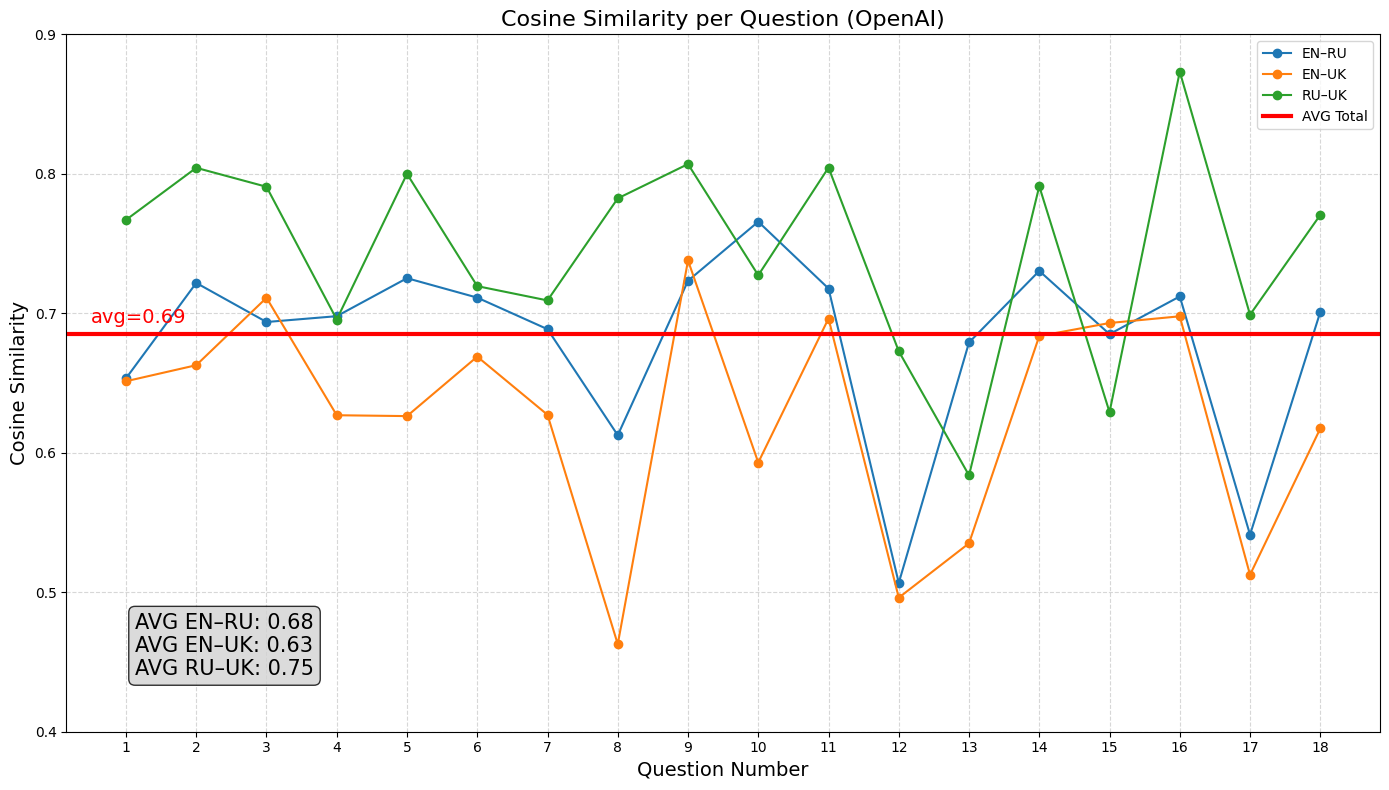

In [168]:
generate_similarity_line_chart_plot('OpenAI', openai_en_ru, openai_en_uk, openai_ru_uk)

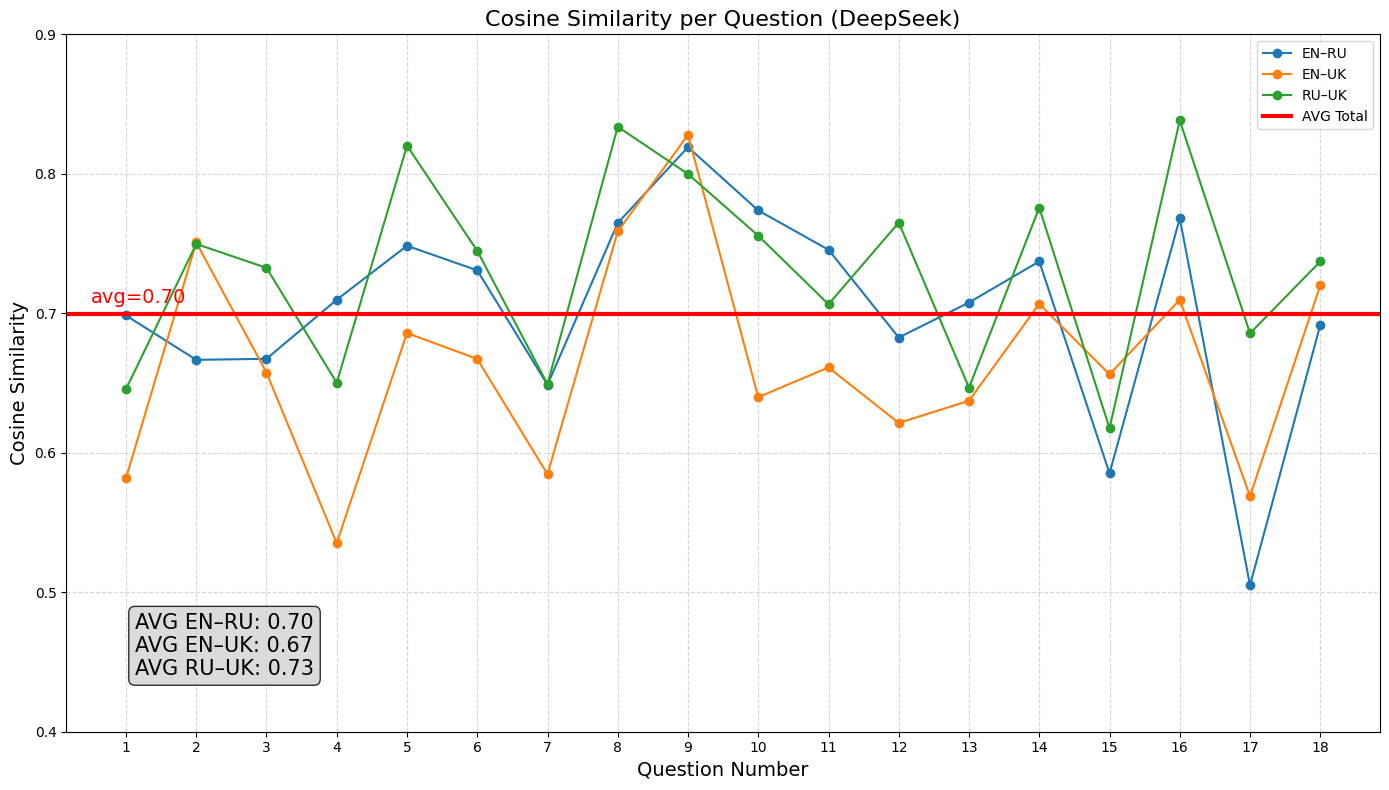

In [169]:
generate_similarity_line_chart_plot('DeepSeek', deepseek_en_ru, deepseek_en_uk, deepseek_ru_uk)

In [125]:
print(f"OpenAI average similarity: EN-RU: {sum(openai_en_ru) / num_questions}; EN-UK: {sum(openai_en_uk) / num_questions}; RU-UK: {sum(openai_ru_uk) / num_questions};")
print(f"Deepseek average similarity: EN-RU: {sum(deepseek_en_ru) / num_questions}; EN-UK: {sum(deepseek_en_uk) / num_questions}; RU-UK: {sum(deepseek_ru_uk) / num_questions};")

OpenAI average similarity: EN-RU: 0.6814763579103682; EN-UK: 0.6277834011448754; RU-UK: 0.745929068989224;
Deepseek average similarity: EN-RU: 0.7028175857332017; EN-UK: 0.6650388605064816; RU-UK: 0.7307803067896101;
